In [1]:
import MetaTrader5 as mt5
from datetime import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
my_account = '######'
my_password = '#######'
server = "Tickmill-Demo"

mt5.initialize(login=my_account, server=server,password=my_password)

True

### Download data from meta trader 5

In [107]:
symbol = "XAGUSD" #Silver symbol
TIMEFRAME = mt5.TIMEFRAME_H1

df = pd.DataFrame(mt5.copy_rates_from_pos(symbol, TIMEFRAME, 0, 90000))
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace = True)
df = df[:-1]
df = df['2019':]
df = df[['open','high','low','close']]

df['returns'] = df['close'].pct_change()

# Categorize candles in bullish and bearish , 1 will be bullish(UP), -1 will be bearish(DOWN)
df['candle'] = df.apply(lambda x: 1 if (x.open < x.close) else -1, axis=1)

# Random Forest will be fed with the 10 previous candles
lags = 10
for n in range(1,lags+1):
    df[f'Lag_{n}'] = df['candle'].shift(n)

X_VARIABLES = [f'Lag_{n}' for n in range(1,11)]    
    
df.dropna(inplace=True)
df.tail(20)

,open,high,low,close,returns,candle,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
time,,,,,,,,,,,,,,,,
2022-02-18 14:00:00,23.769,23.867,23.754,23.860,0.003913,1,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0
2022-02-18 15:00:00,23.861,24.087,23.856,23.966,0.004443,1,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
2022-02-18 16:00:00,23.965,24.064,23.908,23.997,0.001293,1,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2022-02-18 17:00:00,23.997,24.042,23.905,23.911,-0.003584,-1,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
2022-02-18 18:00:00,23.909,23.975,23.889,23.931,0.000836,1,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
2022-02-18 19:00:00,23.934,23.992,23.913,23.972,0.001713,1,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
2022-02-18 20:00:00,23.972,24.001,23.959,23.970,-0.000083,-1,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0
2022-02-18 21:00:00,23.970,23.986,23.933,23.951,-0.000793,-1,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2022-02-18 22:00:00,23.952,23.955,23.872,23.920,-0.001294,-1,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0


In [108]:
# Split the dataset into train and test 
size = int(0.80 * len(df.values))

x_train = df[X_VARIABLES][:size].values
x_test = df[X_VARIABLES][size:].values

y_train = df['candle'][:size].values
y_test = df['candle'][size:].values

In [109]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
model = rand_forest.fit(x_train, y_train)

In [110]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(x_test), normalize=True)*100.0)

Correct Prediction (%):  50.26968716289104


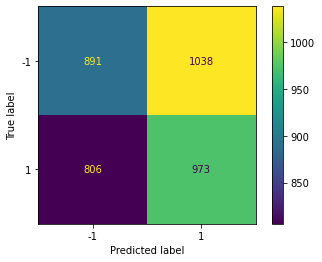

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
    
#results = confusion_matrix(model.predict(x_test), y_test)
plot_confusion_matrix(model, x_test, y_test) 
plt.show()

#### This confussion matrix is telling us that is only predicting well the label 1 (when the market goes up) , with the label -1 (when the market goes down) is not doing a good job.

In [127]:
df['RF_PREDICTIONS'] = model.predict(df[X_VARIABLES].values)

In [128]:
df['strategy_returns'] = df['returns'].shift(-1) * df['RF_PREDICTIONS']

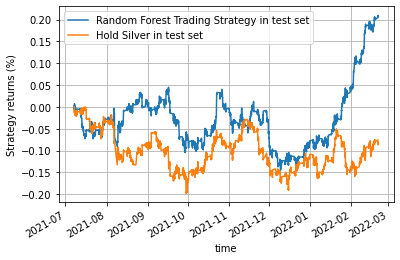

In [141]:
(df.strategy_returns[size:]).cumsum().plot(label = 'Random Forest Trading Strategy in test set')
df['returns'][size:].cumsum().plot(label = 'Hold Silver in test set')
plt.ylabel('Strategy returns (%)')
plt.legend()
plt.grid()
plt.show()